In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from mpl_toolkits.mplot3d import *
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
df = pd.read_csv('/Users/albert/Documents/GitHub/housing_analysis/house-data/train.csv')

In [4]:
df = df[ df.select_dtypes(include=np.number).columns.tolist()]

In [5]:
df.dropna(inplace=True)

In [ ]:
price = df["SalePrice"]

In [ ]:
kvm = df["LotArea"]

In [ ]:
kvm_in = df["GrLivArea"]

In [ ]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()
ax.scatter(kvm, price , label='LotArea vs SalePrice', color='blue') 
ax.set_title('LotArea vs SalePrice')
ax.set_xlabel('Lotarea')
ax.set_ylabel('Saleprice')
ax.grid()
ax.legend()

In [ ]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(kvm, kvm_in, price, label='area vs inarea Vs price', color='blue') 
ax.set_title('GDP vs Social Vs Life')
ax.set_xlabel('area')
ax.set_ylabel('inarea')
ax.set_zlabel('price')
ax.grid()
ax.legend()

In [12]:
%matplotlib widget

In [ ]:
def f(x):
    return x

In [ ]:
#slider
widgets.interact(f, x=5)

In [ ]:
#checkbox
widgets.interact(f, x=True)

In [ ]:
#textbox
widgets.interact(f, x="")

In [ ]:
#dropdown menus
widgets.interact(f, x=[1,2,3,4])

In [6]:
#Here I decompose each row into 10 principal components
from sklearn.decomposition import PCA
def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

In [8]:
#Decomposing the train set:
pca_train_results, pca_train = pca_dec(df, 10)
#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
df_new = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(df.columns)})
df_new = df_new.sort_values('PCA', ascending=False)
#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df_new)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
df_new.head()

,PCA,Variable Names
37,0.999535,SalePrice
3,0.029625,LotArea
16,0.004449,GrLivArea
12,0.003306,TotalBsmtSF
13,0.002830,1stFlrSF


In [15]:
df = df[df['LotArea'].between(0, 200_000)]

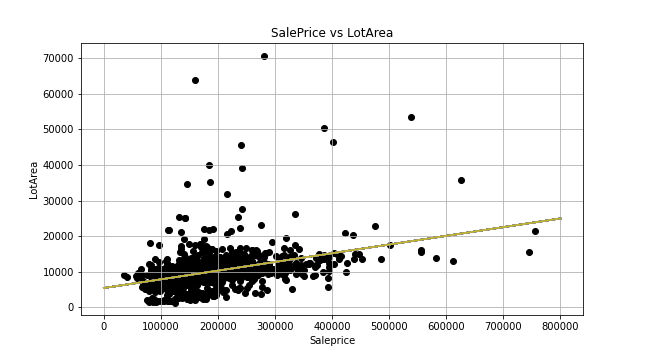

In [32]:
deg = 1
data_reg = np.polyfit(df["SalePrice"], df["LotArea"], deg)
#xp = np.linspace(0.0,1.75,156)
xp = np.linspace(1,50*(8*(10**5), 30))
yp = np.polyval(data_reg, xp)
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()
ax.scatter(df["SalePrice"], df["LotArea"], label = "SalePrice vs LotArea", color="black")
ax.plot(xp, yp, label="Pol. Reg.")
ax.set_title("SalePrice vs LotArea")
ax.set_xlabel("Saleprice")
ax.set_ylabel("LotArea")
ax.grid()

In [ ]:
x = X_train["LotArea"]
y = y_train
data_reg = np.polyfit(x, y, 2)
xp = np.linspace(1,50*(10**3), 30)
pr = np.polyval(data_reg, xp)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot()
ax.grid()
ax.set_xlabel("ponte")
ax.set_ylabel("price")
ax.scatter(x,y)
ax.plot(xp, pr , color="RED")